# Topics as Map or Index

After loading the data, we are going to run the SciKit-Learn's NMF algorithm which is both fast for smaller corpora and deterministic in its outcomes varying the number of components until we seem to have achieved a stable number.

We are including both main and other TED-curated events here so that we can see how much the separate events are part of the larger map or if they are distinct.

Or maybe this is a good time to try out **k-means clustering**?

### Imports and Data

In [1]:
# Imports, Functions, Stopwords
import pandas as pd, re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF


stopwords = set(stopwords.words('english'))

# parentheticals = [ "\(laughter\)", "\(applause\)", "\(music\)", "\(video\)", 
#                   "\(laughs\)", "\(applause ends\)", "\(audio\)", "\(singing\)", 
#                   "\(music ends\)", "\(cheers\)", "\(cheering\)", "\(recording\)", 
#                   "\(beatboxing\)", "\(audience\)", "\(guitar strum\)", 
#                   "\(clicks metronome\)", "\(sighs\)", "\(guitar\)", "\(marimba sounds\)", 
#                   "\(drum sounds\)" ]

# def remove_parens(text):
#     new_text = text
#     for rgx_match in parentheticals:
#         new_text = re.sub(rgx_match, ' ', new_text.lower(), flags=re.IGNORECASE)
#     return new_text

In [7]:
# Load the Data
df = pd.read_csv('../output/TEDall.csv')

# Grab the text of the talks
talks = df.text.tolist()

# Create some labels we can use later but remove the redundant parts of the URL
labels = [re.sub('https://www.ted.com/talks/', '',item) for item in df.public_url.tolist()]

## TF-IDF

In [12]:
# Parametize the vectorizer:
tfidf_vectorizer = TfidfVectorizer(stop_words = stopwords,
                                   min_df = 2, 
                                   max_df = 0.99)

# Vectorize our texts
tfidf = tfidf_vectorizer.fit_transform(talks)
tfidf.shape

(1747, 29200)

## K-Means Clustering

In [10]:
kmeans = KMeans(
    init="random",
    n_clusters=25,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [35]:
kmeans.fit(tfidf)
print(kmeans.inertia_, kmeans.n_iter_)

1454.3197904261158 14


In [32]:
# Now let's try it for a range of possible clusters:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(25, 101, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(tfidf)
    sse.append(kmeans.inertia_)

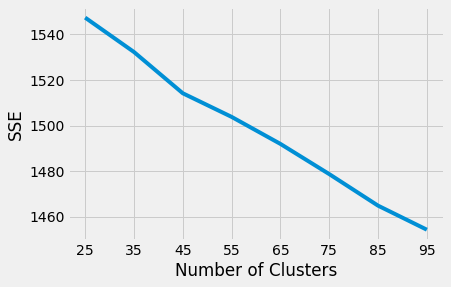

In [33]:
plt.style.use("fivethirtyeight")
plt.plot(range(25, 101, 10), sse)
plt.xticks(range(25, 101, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

**Kmeans** doesn't turn up: the slight elbow at 45 doesn't show up when you run `Kneelocator`:

```python
rom kneed import KneeLocator

kl = KneeLocator(range(25, 101, 10), sse, curve="convex", direction="decreasing")
print(kl.elbow)

UserWarning: No knee/elbow found
None
```

## NMF

With 45 as the most slightly suggested starting point, we run the NMF decomposition bracketing it with 35 and 55 and then hand inspecting the results.

In [ ]:
# First a function to make printing the most associated words with a topic:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [ ]:
n_top_words = 10
n_components = 35

# Here's our parameters
nmf = NMF(n_components = n_components, 
          random_state = 1,
          alpha = .1, 
          l1_ratio=.5).fit(tfidf)

print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

In [ ]:
W = model.fit_transform(X)
H = model.components_

In [ ]:
# Create a dataframe from the resulting array
X = vec.fit_transform(texts)
term_matrix = pd.DataFrame(X.todense(), columns=vec.get_feature_names())
term_matrix.shape